In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_dataset.csv')

df = df[(df['Longitude'] != 0) & (df['Latitude'] != 0)]

df['Cuisines'] = df['Cuisines'].fillna("Unknown")

print("Dataset is loaded \n")
print(f" Total valid geographical records: {len(df)}")

Dataset is loaded 

 Total valid geographical records: 9052



 Spatial Distribution Analysis 



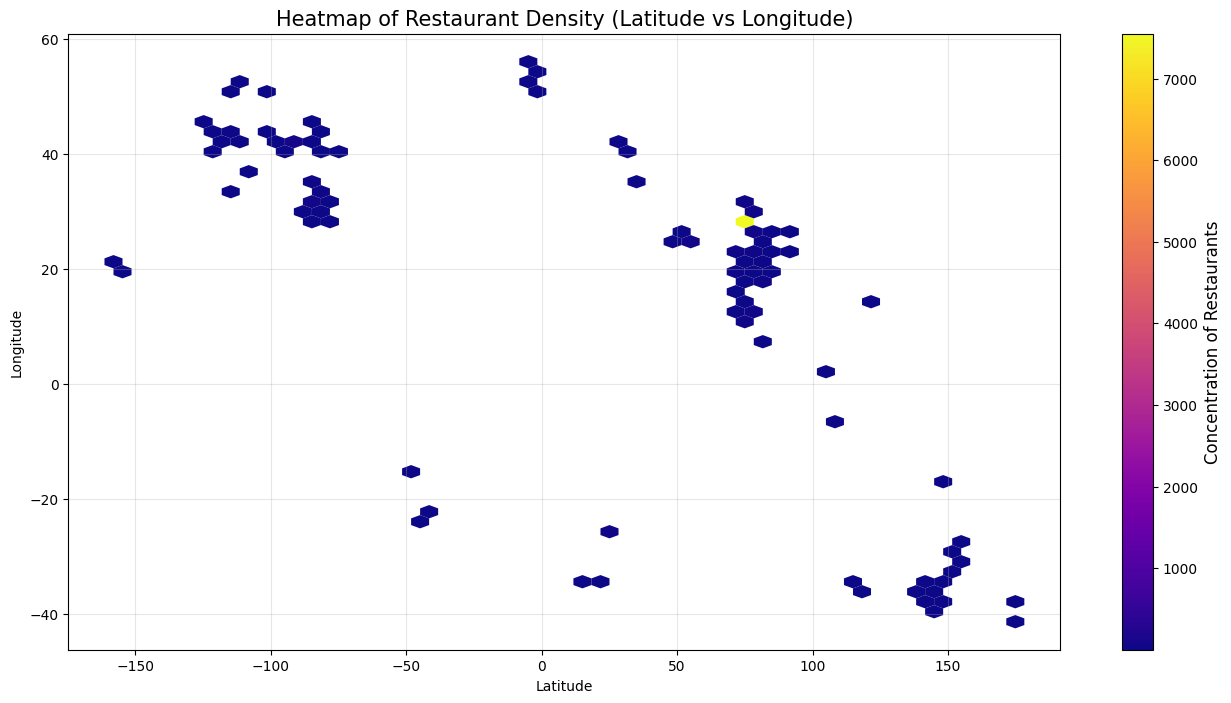

In [3]:
print("\n Spatial Distribution Analysis \n")
plt.figure(figsize=(16,8))
hb = plt.hexbin(df['Longitude'], df['Latitude'], gridsize=50, cmap = 'plasma', mincnt = 1, edgecolors = 'none')
cb = plt.colorbar(hb)
cb.set_label('Concentration of Restaurants', fontsize = 12)
plt.title("Heatmap of Restaurant Density (Latitude vs Longitude)", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid(alpha=0.3)
plt.show()


 City Concentration & Market Share 

| City                   | Restaurant Count   | Market Share (%)   |
|:-----------------------|:-------------------|:-------------------|
| Ahmedabad              | 21                 | 0.23%              |
| Albany                 | 20                 | 0.22%              |
| Athens                 | 20                 | 0.22%              |
| Augusta                | 20                 | 0.22%              |
| Bangalore              | 20                 | 0.22%              |
| Boise                  | 20                 | nan                |
| Brasilia               | 20                 | 0.22%              |
| Cedar Rapids/Iowa City | 20                 | nan                |
| Columbus               | 20                 | nan                |
| Dalton                 | 20                 | nan                |
| Davenport              | 20                 | nan                |
| Des Moines             | 20                 | nan              

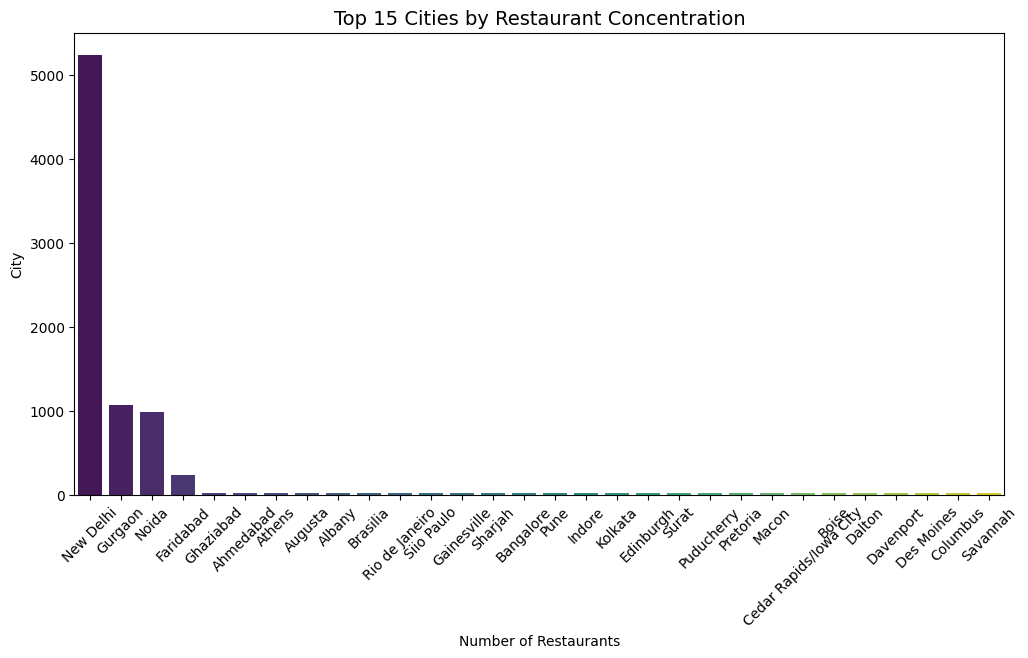

In [4]:
print("\n City Concentration & Market Share \n")

city_counts = df['City'].value_counts().head(30)
city_share = (df['City'].value_counts(normalize=True) * 100).head(15)

city_report = pd.DataFrame({
    'Restaurant Count': city_counts,
    'Market Share (%)': city_share.map('{:.2f}%'.format)
})

print(city_report.to_markdown(numalign="left", stralign="left"))

# Visualizing the concentration
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, hue = city_counts.index, palette='viridis', legend = False)
plt.title('Top 15 Cities by Restaurant Concentration', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Number of Restaurants")
plt.ylabel('City')
plt.show()


Visualizing Performance Metrics by City

|    | City           | Avg_Rating   | Avg_Price   | Avg_Votes   |
|:---|:---------------|:-------------|:------------|:------------|
| 30 | London         | 4.535        | 3           | 436.2       |
| 36 | Orlando        | 4.475        | 2.9         | 1199.45     |
| 42 | Rest of Hawaii | 4.41         | 2.35        | 752.75      |
| 50 | Tampa Bay      | 4.41         | 2.55        | 1370.35     |
| 6  | Bangalore      | 4.375        | 2.7         | 2805.75     |
| 19 | Dubai          | 4.37         | 3.05        | 934.65      |
| 12 | Chennai        | 4.315        | 2.45        | 1384.75     |
| 3  | Ankara         | 4.305        | 2.8         | 131.35      |
| 0  | Abu Dhabi      | 4.3          | 3.3         | 302.25      |
| 43 | Rio de Janeiro | 4.265        | 3.5         | 20.05       |


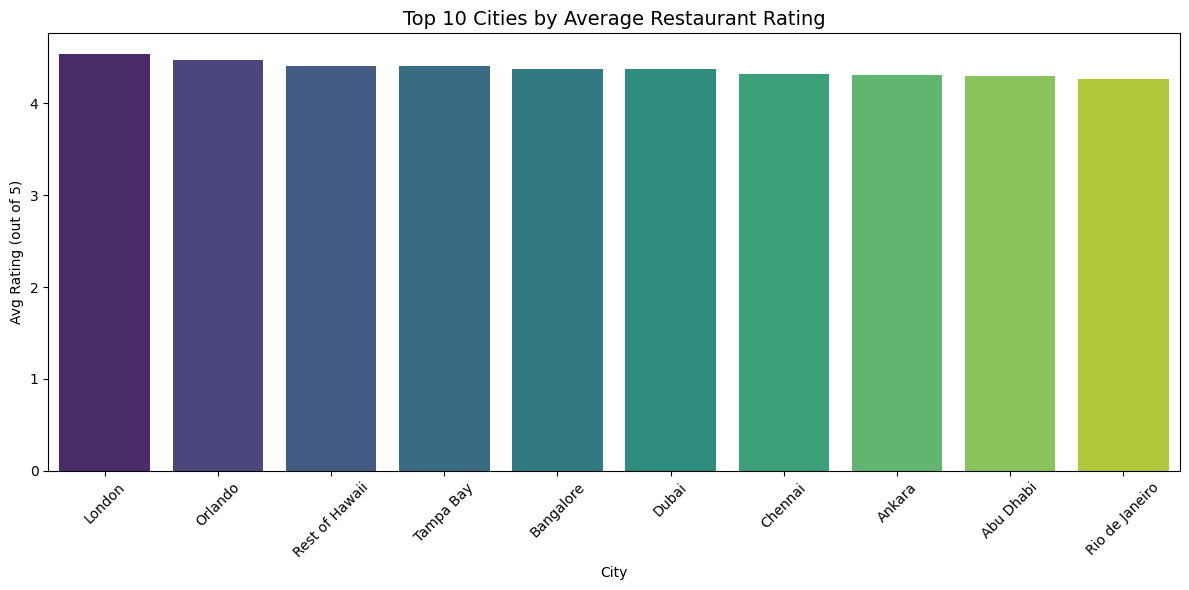

|    | City            | Avg_Rating   | Avg_Price   | Avg_Votes   |
|:---|:----------------|:-------------|:------------|:------------|
| 39 | Pretoria        | 4.19         | 3.7         | 156.3       |
| 18 | Doha            | 4.06         | 3.65        | 163.8       |
| 47 | Singapore       | 3.575        | 3.65        | 31.9        |
| 46 | Siio Paulo      | 3.53         | 3.6         | 27.95       |
| 43 | Rio de Janeiro  | 4.265        | 3.5         | 20.05       |
| 0  | Abu Dhabi       | 4.3          | 3.3         | 302.25      |
| 45 | Sharjah         | 4.03         | 3.3         | 243.65      |
| 53 | Wellington City | 4.25         | 3.25        | 146.3       |
| 10 | Cape Town       | 4.11         | 3.2         | 270.75      |
| 9  | Brasilia        | 3.495        | 3.1         | 10.85       |


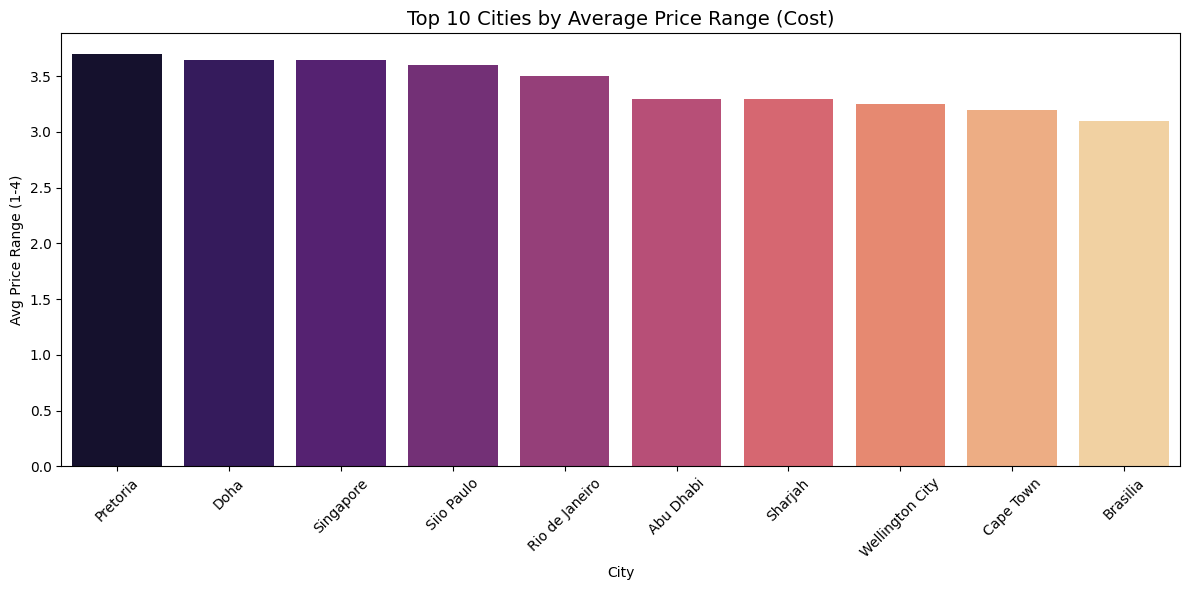

|    | City      | Avg_Rating   | Avg_Price   | Avg_Votes   |
|:---|:----------|:-------------|:------------|:------------|
| 6  | Bangalore | 4.375        | 2.7         | 2805.75     |
| 29 | Kolkata   | 4.255        | 2.85        | 2229.65     |
| 33 | Mumbai    | 4.085        | 2.75        | 1484.85     |
| 12 | Chennai   | 4.315        | 2.45        | 1384.75     |
| 50 | Tampa Bay | 4.41         | 2.55        | 1370.35     |
| 36 | Orlando   | 4.475        | 2.9         | 1199.45     |
| 41 | Pune      | 4.22         | 2.95        | 1036.6      |
| 19 | Dubai     | 4.37         | 3.05        | 934.65      |
| 37 | Pensacola | 4.2          | 2.35        | 844.5       |
| 44 | Savannah  | 4.155        | 2.35        | 768.85      |


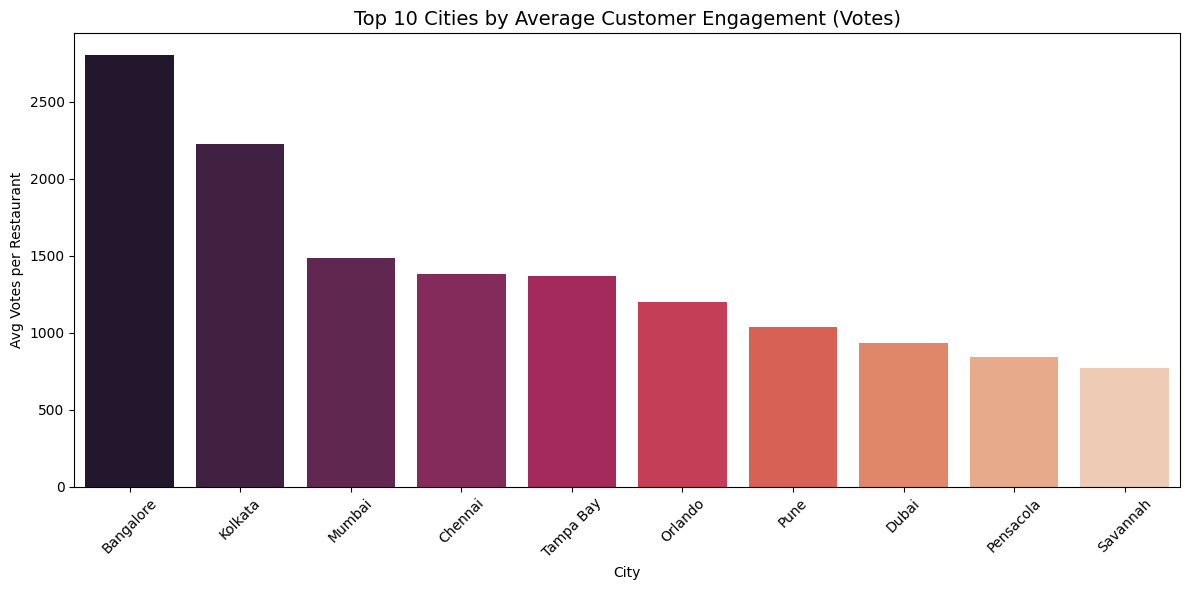

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\nVisualizing Performance Metrics by City\n")

# Prepare the Significant Cities Data
# Filter for cities with at least 20 restaurants to avoid statistical outliers
city_counts = df['City'].value_counts()
significant_city_names = city_counts[city_counts >= 20].index
df_filtered = df[df['City'].isin(significant_city_names)]

# Group and calculate mean metrics
city_performance = df_filtered.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Aggregate rating': 'Avg_Rating',
    'Price range': 'Avg_Price',
    'Votes': 'Avg_Votes'
}).reset_index()

# Average Rating by City
plt.figure(figsize=(12, 6))
top_rated = city_performance.sort_values(by='Avg_Rating', ascending=False).head(10)
print(top_rated.to_markdown(numalign="left", stralign="left"))
sns.barplot(data=top_rated, x='City', y='Avg_Rating', hue='City', palette='viridis', legend=False)
plt.title('Top 10 Cities by Average Restaurant Rating', fontsize=14)
plt.ylabel('Avg Rating (out of 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Price Range by City
plt.figure(figsize=(12, 6))
top_priced = city_performance.sort_values(by='Avg_Price', ascending=False).head(10)
print(top_priced.to_markdown(numalign="left", stralign="left"))
sns.barplot(data=top_priced, x='City', y='Avg_Price', hue='City', palette='magma', legend=False)
plt.title('Top 10 Cities by Average Price Range (Cost)', fontsize=14)
plt.ylabel('Avg Price Range (1-4)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Popularity (Votes) by City
plt.figure(figsize=(12, 6))
top_voted = city_performance.sort_values(by='Avg_Votes', ascending=False).head(10)
print(top_voted.to_markdown(numalign="left", stralign="left"))
sns.barplot(data=top_voted, x='City', y='Avg_Votes', hue='City', palette='rocket', legend=False)
plt.title('Top 10 Cities by Average Customer Engagement (Votes)', fontsize=14)
plt.ylabel('Avg Votes per Restaurant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
print("\nGeographical Cuisine Diversity Index\n")

def count_unique_cuisines(cuisine_series):
    unique_set = set()
    for entry in cuisine_series:
        parts = [c.strip() for c in str(entry).split(',')]
        unique_set.update(parts)
    return len(unique_set)

diversity_index = df.groupby('City')['Cuisines'].apply(count_unique_cuisines).sort_values(ascending=False)

print("Cities with Highest Cuisine Diversity (Unique Cuisine Types):")
print(diversity_index.head(50).to_markdown(numalign="left", stralign="left"))


Geographical Cuisine Diversity Index

Cities with Highest Cuisine Diversity (Unique Cuisine Types):
| City                   | Cuisines   |
|:-----------------------|:-----------|
| New Delhi              | 80         |
| Gurgaon                | 71         |
| Noida                  | 48         |
| Pretoria               | 32         |
| Singapore              | 29         |
| Faridabad              | 29         |
| Orlando                | 27         |
| Abu Dhabi              | 27         |
| Mumbai                 | 26         |
| Augusta                | 25         |
| Hyderabad              | 24         |
| Pocatello              | 24         |
| Pensacola              | 24         |
| Tampa Bay              | 24         |
| Des Moines             | 24         |
| Waterloo               | 23         |
| Macon                  | 23         |
| Pune                   | 23         |
| Puducherry             | 22         |
| Sharjah                | 22         |
| Sioux City       

In [10]:
print(" FINAL GEOGRAPHICAL INSIGHTS")

insights = '''
1. GEOGRAPHICAL CLUSTERING: The scatter and hexbin plots reveal that restaurants
   are not evenly distributed; they form massive clusters in specific
   metropolitan coordinates. Areas outside these hubs show nearly zero density.

2. CITY DOMINANCE: The top 5 cities account for a disproportionate 'Market Share'
   of the total dataset, suggesting these are the primary economic centers for
   the food industry.

3. PRICE-LOCATION CORRELATION: Higher average price ranges are correlated
   with specific cities. For example, cities with higher Avg_Price usually
   maintain higher Avg_Ratings, suggesting a 'Premium Hub' effect in those locations.

4. DIVERSITY PATTERNS: Cuisine diversity is highest in the most populated cities.
   This shows that geographical concentration leads to cultural variety, as
   larger markets support more specialized and international cuisines.
'''

print(insights)

 FINAL GEOGRAPHICAL INSIGHTS

1. GEOGRAPHICAL CLUSTERING: The scatter and hexbin plots reveal that restaurants 
   are not evenly distributed; they form massive clusters in specific 
   metropolitan coordinates. Areas outside these hubs show nearly zero density.

2. CITY DOMINANCE: The top 5 cities account for a disproportionate 'Market Share' 
   of the total dataset, suggesting these are the primary economic centers for 
   the food industry.

3. PRICE-LOCATION CORRELATION: Higher average price ranges are correlated 
   with specific cities. For example, cities with higher Avg_Price usually 
   maintain higher Avg_Ratings, suggesting a 'Premium Hub' effect in those locations.

4. DIVERSITY PATTERNS: Cuisine diversity is highest in the most populated cities. 
   This shows that geographical concentration leads to cultural variety, as 
   larger markets support more specialized and international cuisines.

